In [6]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(lubridate)

league_stat <- read.csv('/dsa/home/nfe9r6/jupyter/f20dsa7040_nfe9r6/modules/module8/NBA_League_Stats.csv')
player_salary <- read.csv('/dsa/home/nfe9r6/jupyter/f20dsa7040_nfe9r6/modules/module8/NBA_Player_Salary.csv')
player_stat <- read.csv('/dsa/home/nfe9r6/jupyter/f20dsa7040_nfe9r6/modules/module8/NBA_Player_Stats.csv')
playoff_stat <- read.csv('/dsa/home/nfe9r6/jupyter/f20dsa7040_nfe9r6/modules/module8/Playoff_Team_Stats.csv')

player <- merge(player_salary, player_stat, by.player_salary = player_id, by.player_stat = player_id,
            all.player_salary = FALSE, all.player_stat = FALSE)


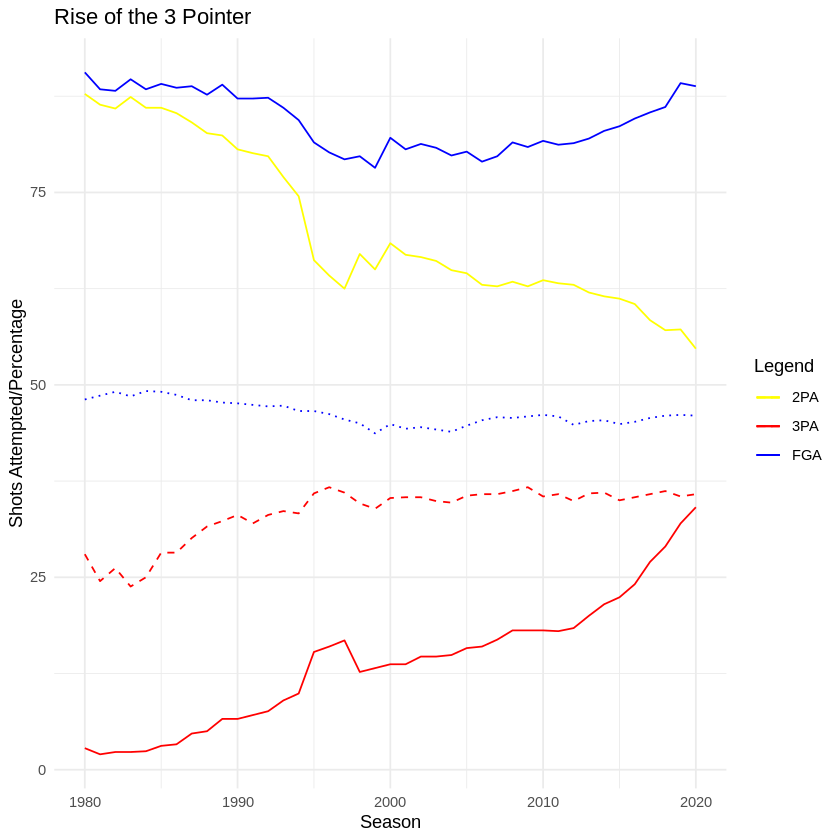

In [7]:
Rise_of_3_Pointer <-ggplot(league_stat, aes(x = Season)) +
                            geom_line(aes(y=ThreePA, color ='3PA')) + 
                            geom_line(aes(y=FGA, color = 'FGA')) +
                            geom_line(aes(y=TwoPA, color = '2PA')) +
                            geom_line(aes(y=(FGPercent*100), color='FGA'), linetype='dotted')+ 
                            geom_line(aes(y=(ThreePercent*100), color='3PA'), linetype='dashed')+
                            scale_colour_manual(name="Legend",values=c('3PA'="red", 'FGA'='blue', '2PA'='yellow'))+
                            labs(title ="Rise of the 3 Pointer", y = "Shots Attempted/Percentage", x = "Season") +
                            theme_minimal()
Rise_of_3_Pointer

In [78]:
player <- subset(player, THreePA > 0)
player <- subset(player, G > 15)

In [79]:
player$highshooting <- player$ThreePercent >.3425
player$lowshooting <- player$ThreePercent <= .3425

In [80]:
player1 <- aggregate(cbind(highshooting,lowshooting) ~ Age,player,  sum)

In [81]:
head(player1)

Age,highshooting,lowshooting
<int>,<int>,<int>
19,3,4
20,4,12
21,9,16
22,24,20
23,23,12
24,23,30


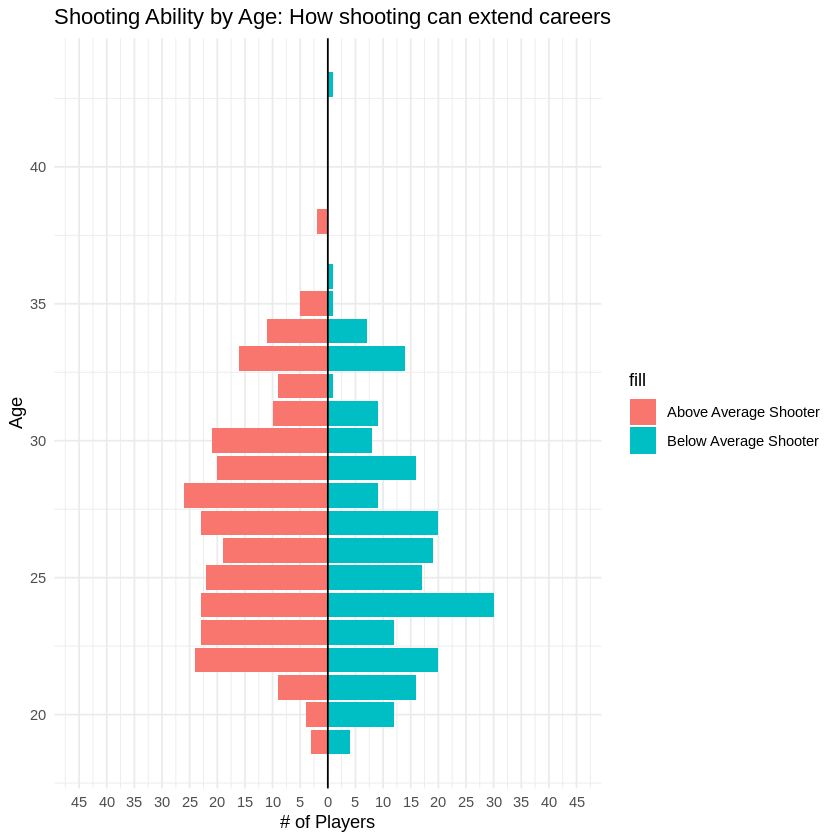

In [82]:
ggplot(player1) + 
    geom_bar(aes(x=Age, y=lowshooting, fill = 'Below Average Shooter'), stat='identity') +
    geom_bar(aes(x= Age, y=-highshooting, fill = 'Above Average Shooter'), stat='identity') +
    coord_flip() +
    ggtitle("Shooting Ability by Age: How shooting can extend careers") +
    ylab('# of Players') +
    geom_abline(slope=0)+
    theme_minimal()+
    scale_y_continuous(labels = abs, limits=c(-45, 45), breaks=seq(-45,45,5))

In [83]:
player$Salary <- as.numeric(gsub('\\$|,', '', player$Salary))
player$TotalThree <- with(player, 3 * ThreeP)

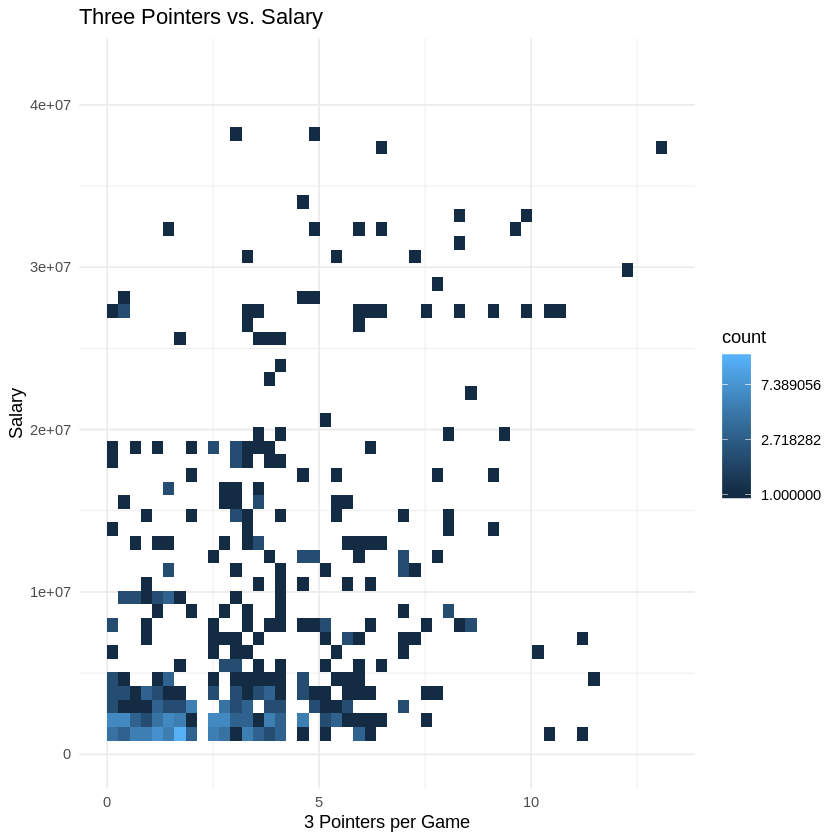

In [84]:
ggplot(player, aes(TotalThree, Salary)) + geom_bin2d(bins=50) +
    scale_fill_gradient(trans="log")+
    scale_y_continuous(labels = abs, limits=c(0, 42000000), breaks=seq(0,42000000, 10000000))+
    theme_minimal()+
    labs(title= 'Three Pointers vs. Salary',x='3 Pointers per Game' ,y='Salary')
    

In [ ]:
install.packages('radarchart')
library('fmsb')

In [85]:
playoff_stat$percent_of_three <- (playoff_stat$X3PA/playoff_stat$FGA)

In [87]:
aggregate(cbind(X3P, X3PA, X3P., percent_of_three) ~ Playoffs, playoff_stat, mean)

Playoffs,X3P,X3PA,X3P.,percent_of_three
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
N,11.72143,33.25714,0.3529286,0.3732942
Y,12.60625,34.84375,0.3620000,0.3932158


In [107]:
radar_data <- data.frame('Three.Percentage'= c(15.60, 9.6, 11.72, 12.61),
               'Three.Attempt'= c(45.3, 28, 33.26, 34.84),
               'Three.Made'= c(.38, .333,.3530, .3620),
               'Percent.3.Taken' = c(.5011, .3164, .3733, .3932),
               row.names = c("max", "min", 'Non_Playoff', 'Playoff_Teams')
)
colors_line <- c(scales::alpha('gold',.9),
                 scales::alpha('blue',.9))
colors_fill <- c(scales::alpha('gold',.1),
                 scales::alpha('blue',.1))

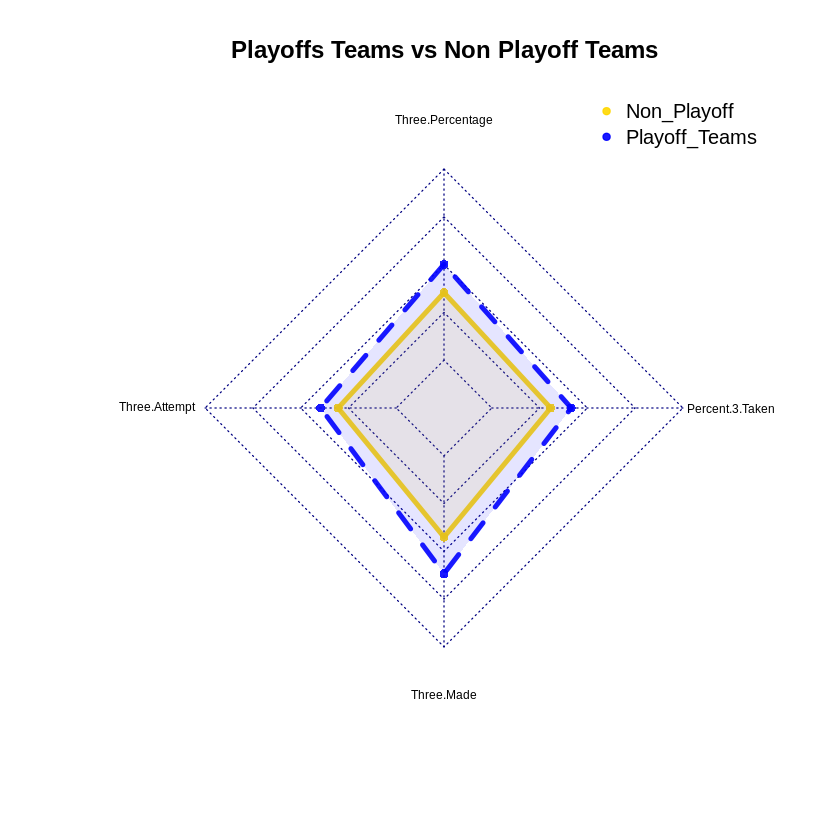

In [108]:

radarchart(radar_data,
          seg = 4,
          title = 'Playoffs Teams vs Non Playoff Teams',
          pcol=colors_line,
          pfcol=colors_fill,
          plwd = 4,
          vlcex = .6)
legend(x=.6, y=1.35,
      legend = rownames(radar_data[-c(1,2),]),
      bty='n', pch=20, col = colors_line, cex=1, pt.cex=1.2)

In [ ]:
png(filename="myplot.png")